In [22]:
%matplotlib notebook
import h5py
import os
import numpy as np
import matplotlib.pyplot as plt

In [4]:
base_dir = '/home/david/git/LVAE2/out'

In [25]:
def load_stat(filename):
    stat = dict()
    with h5py.File(filename, 'r') as f:
        for key in f.keys():
            stat[key] = np.array(f[key])
            print(key, stat[key].shape)
    return stat

In [61]:
def filt(x, window_size=100):
    y = np.convolve(x, np.ones((window_size,))/window_size, mode='same')
    return y

In [56]:
!dir out/

20190826-230248  20190828-224438  20190828-232426
20190828-171617  20190828-224537  20190828-232502
20190828-223739  20190828-224825  20190828-234330


In [62]:
filename = os.path.join(base_dir, '20190828-234330', 'stat.h5')
stat = load_stat(filename)

elbo (470000,)
kl_0 (470000,)
kl_1 (470000,)
kl_tot (470000,)
log_px (470000,)
log_pz_0 (470000,)
log_pz_1 (470000,)
log_qz_0 (470000,)
log_qz_1 (470000,)


<IPython.core.display.Javascript object>


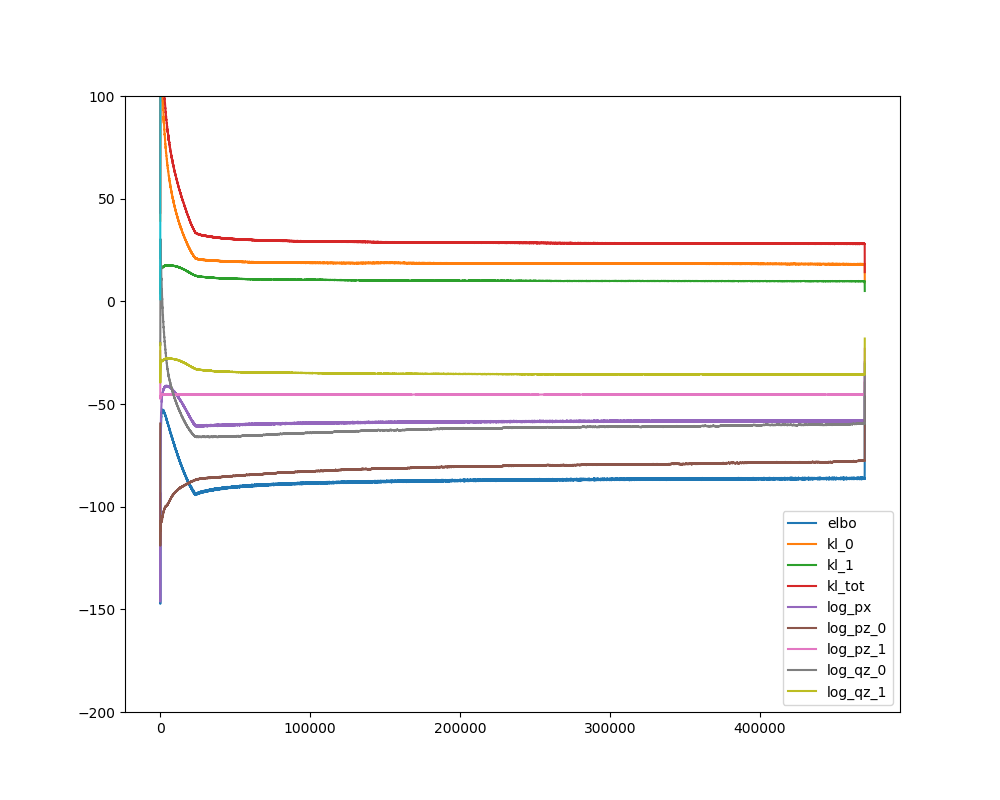

In [63]:
plt.figure(figsize=(10, 8), dpi= 80)
for key in stat.keys():
    plt.plot(filt(stat[key]))
plt.ylim([-200, 100])
_ = plt.legend(stat.keys())

In [104]:
import re

#str = '*Epoch=4999	Time=33.09	LR=0.00200	E_qsamples=1	IVAEsamples=1	temp: 1.00	TRAIN:	Cost=-85.84437	logp(x|z1)=-61.05516	log p(z): -81.585|-45.422	log q(z): -70.604|-31.614'
epoch, t, elbo, log_px, log_pz_0, log_pz_1, log_qz_0, log_qz_1 = [], [], [], [], [], [], [], []
with open('../LVAE/outfolder_20190811/trainlogfile.log') as f: 
    for mystr in f.readlines():
        lx = re.split('=| |\t|\|', mystr)
        epoch += [int(lx[1])]
        t += [float(lx[3])]
        elbo += [float(lx[14])]
        log_px += [float(lx[17])]
        log_pz_0 += [float(lx[20])]
        log_pz_1 += [float(lx[21])]
        log_qz_0 += [float(lx[20])]
        log_qz_1 += [float(lx[21])]
epoch = np.array(epoch)
elbo = np.array(elbo)
log_px = np.array(log_px)
log_pz_0 = np.array(log_pz_0)
log_pz_1 = np.array(log_pz_1)
log_qz_0 = np.array(log_qz_0)
log_qz_1 = np.array(log_qz_1)


<IPython.core.display.Javascript object>


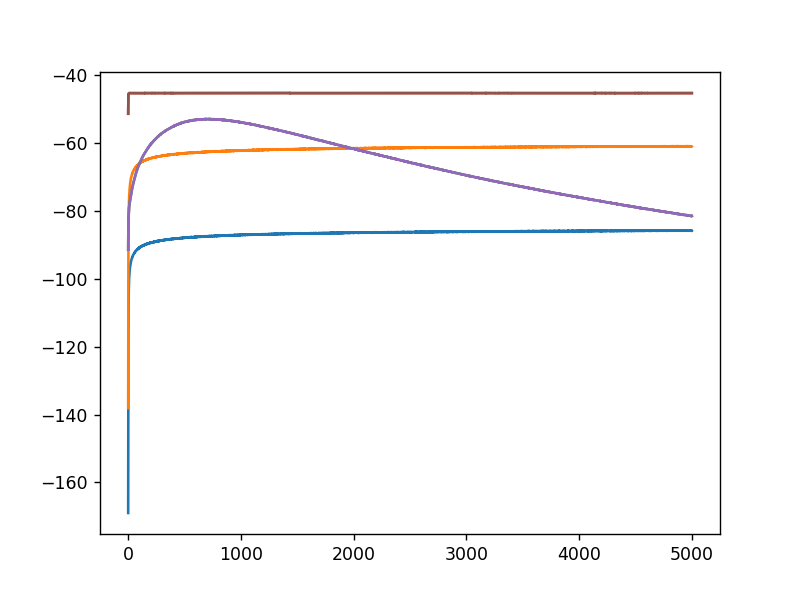

In [105]:
plt.figure()
plt.plot(epoch, elbo)
plt.plot(epoch, log_px)
plt.plot(epoch, log_pz_0)
plt.plot(epoch, log_pz_1)
plt.plot(epoch, log_qz_0)
plt.plot(epoch, log_qz_1)